## Introduction

An introduction to regression analysis, a fundamental technique used in predictive modeling and data analysis.

## Table of Contents

- [Linear Regression](#linear-regression)
- [Polynomial Regression](#polynomial-regression)
- [Multiple Linear Regression](#multiple-linear-regression)
- [Conclusion](#conclusion)

In [ ]:
!pip install sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML for Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Control Display
pd.option.display.max_columns =50

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
df = pd.read_csv('/content/heart_disease.csv')
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


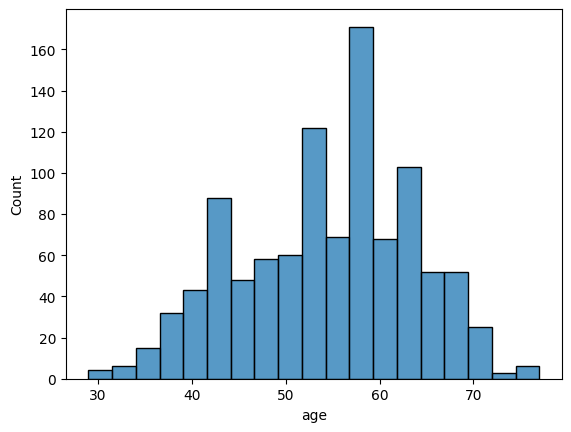

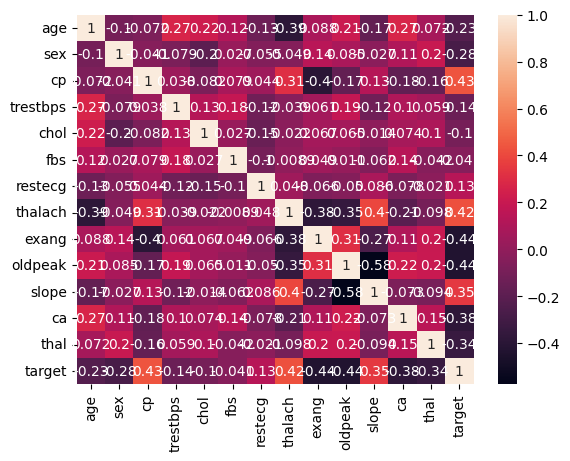

In [ ]:
# Visualize the distribution of a numerical feature
sns.histplot(df['age'])
plt.show()

# Visualize the correlation between features
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
# Handling missing values
df = df.dropna()  # Drop rows with missing values

# Encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# Scaling numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
df_scaled = pd.DataFrame(df_scaled, columns=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])


In [ ]:
# Feature importance using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']
rf = RandomForestClassifier()
rf.fit(X, y)
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Creating new features
df['age_squared'] = df['age'] ** 2


In [ ]:
# Splitting the dataset into train and test sets
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training and evaluating a Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy = lr.score(X_test, y_test)


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(lr, parameters, cv=5)
grid_search.fit(X_train, y_train)
best_lr = grid_search.best_estimator_


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
ensemble = VotingClassifier([('Random Forest', rf), ('Gradient Boosting', gb)])
ensemble.fit(X_train, y_train)
accuracy = ensemble.score(X_test, y_test)


# ScatterPlot

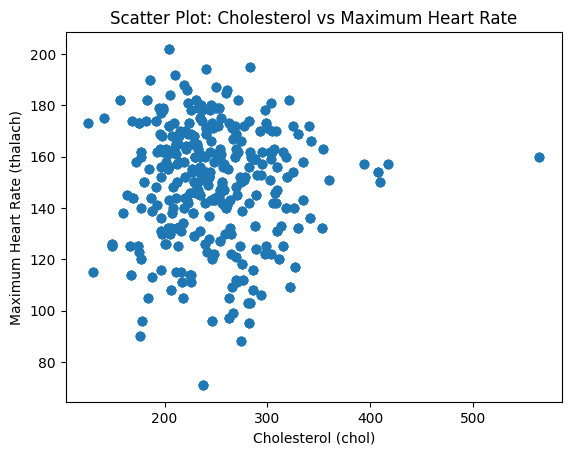

In [ ]:

# Create a scatter plot
plt.scatter(df['chol'], df['thalach'])
plt.xlabel('Cholesterol (chol)')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.title('Scatter Plot: Cholesterol vs Maximum Heart Rate')
plt.show()


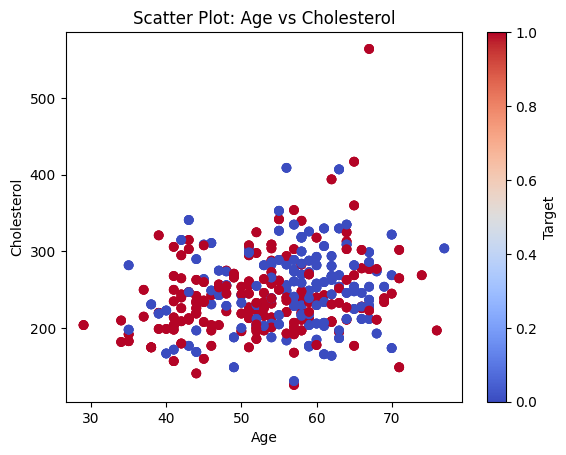

In [ ]:
# Extract the 'age' and 'chol' columns
age = df['age']
chol = df['chol']

# Create scatter plot
plt.scatter(age, chol, c=df['target'], cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Scatter Plot: Age vs Cholesterol')
plt.colorbar(label='Target')
plt.show()